In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info()) 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [4]:
# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')

In [5]:
#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]

In [6]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

## 다항 변환
### PolynomialFeatures 
> 입력값  x 를 다항식으로 변환한다.

\begin{align*}
\begin{aligned}
x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\
[x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_2^2, x_1x_2 ]
\end{aligned}
\end{align*}

참고 : https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/

In [7]:
# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

(274, 3)
(274, 1)


In [8]:
lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습 

x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산

print(r_square )    #결정 계수
print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

0.7087009262975685
기울기 a :  [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
절편 b :  62.58071221573144


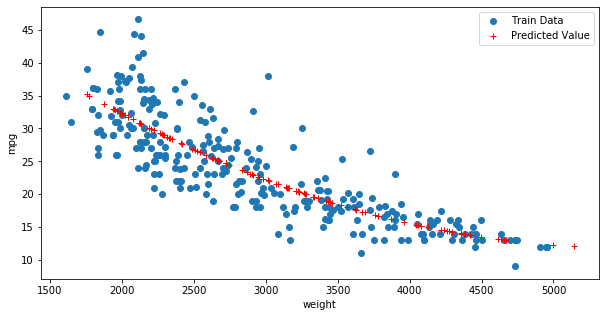

In [9]:
y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

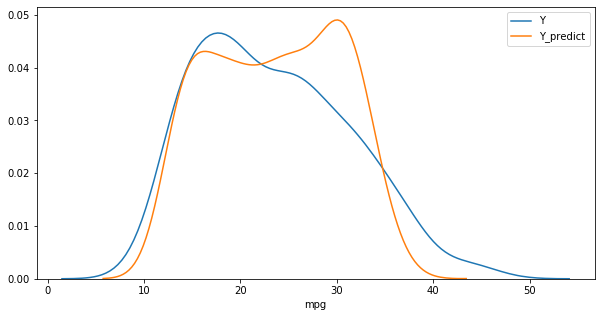

In [10]:
#전체 데이터 X 를 2차항으로 변형
X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()